In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# IMporting DATASET

dataset= pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
# Extracting Columns from dataset
X = dataset.iloc[:,3:13]
Y = dataset.iloc[:,13]

In [10]:
# Creating dummy variables(EMPTY COLUMNS) for converting categorical features  to numerical and storing them 
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [11]:
## Concatenate the Data Frames
## Add the dummy columns to main dataset
X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [14]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential # Responsible in creating NN
from keras.layers import Dense # Creating HIdden Layer
from keras.layers import LeakyReLU,PReLU,ELU # For Layers
from keras.layers import Dropout # Regularization parameter 

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [17]:

# Initialising the ANN
# Empty NN
classifier = Sequential()

In [19]:
# Input & 1st hidden layer
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))


In [20]:
# 2nd hidden layer
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))


In [21]:
# Output layer
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform',activation='sigmoid'))


In [23]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [41]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 100, epochs = 50)


Epoch 1/50
54/54 [==============================] - 0s 3ms/step - loss: 0.3226 - accuracy: 0.8666 - val_loss: 0.3513 - val_accuracy: 0.8641
Epoch 2/50
54/54 [==============================] - 0s 2ms/step - loss: 0.3221 - accuracy: 0.8645 - val_loss: 0.3514 - val_accuracy: 0.8633
Epoch 3/50
54/54 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8651 - val_loss: 0.3514 - val_accuracy: 0.8622
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8656 - val_loss: 0.3514 - val_accuracy: 0.8629
Epoch 5/50
54/54 [==============================] - 0s 2ms/step - loss: 0.3218 - accuracy: 0.8651 - val_loss: 0.3515 - val_accuracy: 0.8622
Epoch 6/50
54/54 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.8647 - val_loss: 0.3516 - val_accuracy: 0.8626
Epoch 7/50
54/54 [==============================] - 0s 3ms/step - loss: 0.3216 - accuracy: 0.8653 - val_loss: 0.3515 - val_accuracy: 0.8626
Epoch 8/50
54/54 [==

In [33]:

# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


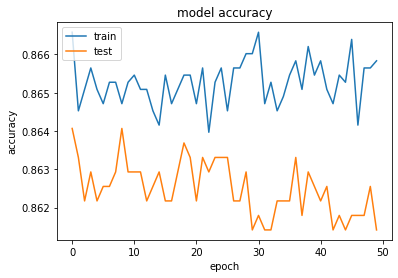

In [42]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

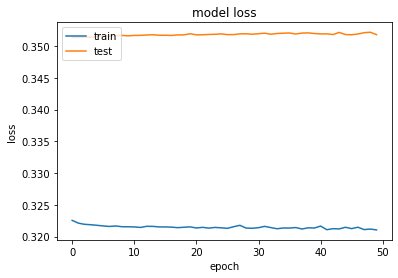

In [43]:

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [45]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [46]:
cm

array([[1502,   93],
       [ 187,  218]])

In [47]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [48]:
score


0.86